[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JamesMTucker/DATA_340_NLP/blob/master/Fall_2023/notebooks/02_Properties_of_Language.ipynb)

# Lecture 04: Properties of Language, Statistics, Information Theory

## Objectives

* Understand the basic properties of language by using some EDA techniques
* Using statistical methods to understand language
* Understand the basics of information theory

## Readings

* [Jurafsky & Martin, Ch 17](../../course_readings/Jurafsky_Martin_chapter_17_363-388.pdf)
  * Context-free grammars
  * Treebanks
  * CKY parsing
  * N.B.: The 'Bibliographical and Historical Notes' section is good context
* [Jurafsky & Martin, Ch 18](../../course_readings/Jurafsky_Martin_chapter_18_389-412.pdf)
  * Dependency Parsing
  * Dependency Relations
  * Tradition-based dependency parsing
  * Graph-based dependency parsing

### Using spaCy for Dependency Parsing

* [spaCy Dependency Parsing](https://spacy.io/usage/linguistic-features#dependency-parse)
* [spaCy Dependency Parsing Demo](https://explosion.ai/demos/displacy)

In [ ]:
# Dependency parsing

import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp(u'I have flown to LA. Now I am flying to Frisco.')

for token in doc:
    print(f'{token.text:{10}} {token.pos_:{10}} {token.dep_:{10}}')

In [ ]:
# Dependency parsing
# https://spacy.io/usage/linguistic-features#dependency-parse

In [ ]:
# use displacy to visualize the dependency tree
from spacy import displacy

doc = nlp(u'I have flown to LA. Now I am flying to Frisco.')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 100})

## Our shared humanity?

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3049087/

| Article | Pubmed Link |
| ---- | ---- |
| ![17_Languages](../images/figure_1.png) | ![17_Languages](../images/17_languages_qr.png) |

### Swadesh terms

* [Swadesh list](https://en.wikipedia.org/wiki/Swadesh_list)
* [Swadesh list](https://en.wiktionary.org/wiki/Appendix:Swadesh_lists)

What are Swadesh terms?

* A list of words that are thought to be universal across languages


How does this affect our analysis of texts?

* We can use these words to compare languages
* We can use these words to compare texts within a language
* We can gain an understanding of how langauge is used within domains of knowledge using statistical methods

### Similarities of Swadesh term usage in different languages

<center><img src="../images/figure_3.png"  width="800" height="600"></center>

## Using simple statistics to shed light on documents and langauge

In [ ]:
import os
from pathlib import Path

In [ ]:
# data files
data_folder = Path("../datasets")
# get all files in the data folder
data_files_list = [f for f in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, f))]

In [ ]:
# print the list of data files
data_files_list

### Zipf's Law

[George Kingsley Zipf](https://en.wikipedia.org/wiki/George_Kingsley_Zipf) argued that most words are not used that often. He formally defined his theorem as
$$P_n \sim \frac{1}{n^a}$$

It is a power law distribution. The frequency of any word is inverse in porportion to its rank in the vocabulary.

### Zipf's Law in action

In [ ]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


def zipf_analysis(text, book) -> None:
    # Tokenize the text into words
    words = text.split()
    
    # Count the frequency of each word
    # word_freq = Counter(words) # this one line of code does the same as the following for loop
    
    # vanilla python implementation
    word_freq = {}
    for word in words:
        word_freq[word] = word_freq.get(word, 0) + 1
    
    
    # Sort the words by frequency - highest occuring terms are at the top
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    
    # Plot the word frequency and rank to check for Zipf's law
    word_rank = np.arange(1, len(sorted_word_freq)+1) # X variable
    word_frequency = [i[1] for i in sorted_word_freq] # Y variable
    
    # Plot log to visualize the power law distribution
    plt.loglog(word_rank, word_frequency, marker='o')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title(f"Zipf's Law for {book}")
    plt.show()

In [ ]:
# Lets iterate over the generator and create a list of lists with a Short Volume name and its text
corpus = []

# Iterate over the files
for f in data_files_list:
    # open the file and append the text to the corpus list
    with open(os.path.join(data_folder, f), 'r') as file:
        corpus.append([f, file.read()])

### J.R.R. Tokein's The Lord of The Rings

In [ ]:
# let's use our zipf_analysis function to plot the word frequency and rank for each book
for book in corpus:
    zipf_analysis(book[1], book[0])

### Friedrich Nietzsche's Beyond Good and Evil

In [ ]:
## Zipf's law in action
for book in corpus:
    if not 'LOTR' in book[0]:
        zipf_analysis(book[1], book[0])

### Most used word in the USA:

The above demonstration of _The Lord of the Rings_ is generalizable to any English text, and as discussed above to many languages for certain kinds of words.

N.B.: Notice the study of Manning and Schutze, _Foundations of Statistical Natural Language Processing_, who demonstrate that a randomly created text follows the power law observation as discussed by Mandelbrot. They conclude their discussion observing that:

<img src="../images/most_used_01.png"  width="800" height="400">

<br />

> what makes frequency-based approaches to language hard is that almost all words are rare. Zipf's law is a good way to encapsulate this insight. (p. 29)

Thus ... <br>
<img src="../images/most_used_02.png" width="800" height="400">



### What about Tokens/Lemmas and Zipf's Law?

In [ ]:
## let's tokenize our text according to their lemmata

import spacy

nlp = spacy.load('en_core_web_sm')

# increase the max length of the text that can be processed
nlp.max_length = 2000000

# create a list of lists with a Short Volume name and its text
corpus = []

# Iterate over the files
for f in data_files_list:
    # open the file and append the text to the corpus list
    with open(os.path.join(data_folder, f), 'r') as file:
        corpus.append([f, nlp(file.read())])

In [ ]:
# let's plot the data again using the lemmata
for book in corpus:
    zipf_analysis(' '.join([token.lemma_ for token in book[1]]), book[0])

## What about the distribution of words in a document?

### Word Frequency Distribution

What is the distribution of words in a document?

In [ ]:
# look at the distribution of the words

# create a list of the lemmata in the corpus
words_freq = []

# Iterate over the files
for f in data_files_list[:1]:
    # open the file and append the text to the corpus list
    with open(os.path.join(data_folder, f), 'r') as file:
        words_freq.extend([token.lemma_ for token in nlp(file.read())])

In [ ]:
# Count the frequency of each word
word_freq = Counter(words_freq)

# count the lemma frequency
lemma_freq = Counter([token.lemma_ for token in nlp(' '.join(words_freq))])

# 10 most common lemmas
most_com = lemma_freq.most_common(20)

# 10 least common lemmas
least_com = lemma_freq.most_common()[-20:]

In [ ]:
# create dataframe of the most common lemmas and least common lemmas
import pandas as pd

df_most = pd.DataFrame(most_com, columns=['lemma', 'frequency'])
df_least = pd.DataFrame(least_com, columns=['lemma', 'frequency'])

# concatenate the dataframes
df = pd.concat([df_most, df_least])
df.head(50)


In [ ]:
df.head()

### Word Length Distribution

What is the distribution of word lengths in a document?

In [ ]:
# word length distribution
word_length = [len(word) for word in words_freq]

# plot the word length distribution 
# change the ticks to increment by 5
plt.hist(word_length, bins=65)
plt.xticks(np.arange(0, 65, 5))

### Sentence Length Distribution

What is the distribution of sentence lengths in a document?

In [ ]:
# plot the sentence length distribution

# use spacy to break sentences
sentences = [sent for sent in nlp(corpus[0][1]).sents]

In [ ]:
# as read from the file
corpus[0][1][:100]

In [ ]:
# SpaCy NLP Sentence Detection
sentences[:5]

In [ ]:
# plot the sentence length distribution
sentence_length = [len(sent) for sent in sentences]

# plot the sentence length distribution
plt.hist(sentence_length, bins=65)

In [ ]:
# Use Numpy to get the mean and standard deviation of the sentence length
import numpy as np

np.mean(sentence_length), np.std(sentence_length), np.percentile(sentence_length, 95)

### Part of Speech Distribution

What is the distribution of parts of speech in a document?

In [ ]:
# use spacy to POS tags and plot the distribution of the POS tags

pos = [token.pos_ for token in nlp(corpus[0][1])]

# plot the POS tag distribution
plt.hist(pos, bins=20)
# rotate the x-axis
plt.xticks(rotation=90)

### N-Gram Distribution

What is the distribution of n-grams in a document?

In [ ]:
# What is the most common n-grams in the corpus?

# n-grams using python
bi_grams = []

# iterate over the tokens in the corpus
for i in range(len(words_freq)-1):
    bi_grams.append((words_freq[i], words_freq[i+1]))

In [ ]:
# count the frequency of each bigram
bi_gram_freq = Counter(bi_grams)

bi_gram_freq.most_common(10)

In [ ]:
least_com = bi_gram_freq.most_common()[-10:]
least_com

### Collocation Distribution

What is the distribution of collocations in a document

What is a collocation?

Linguistic collocations refer to sequences of words that co-occur more often than would be expected by chance. Testing the significance of collocations is a common task in computational linguistics and Natural Language Processing (NLP). There are several statistical measures used to test the significance of collocations. Some of the most common ones include:

1. **Mutual Information (MI)**:
   $$ MI(w_1, w_2) = \log_2 \left( \frac{P(w_1, w_2)}{P(w_1) \times P(w_2)} \right) $$
   where \( P(w_1, w_2) \) is the probability of the words \( w_1 \) and \( w_2 \) occurring together, and \( P(w_1) \) and \( P(w_2) \) are the probabilities of the words \( w_1 \) and \( w_2 \) occurring independently.

2. **Chi-squared Test**:
   The chi-squared test compares the observed frequency of a collocation to the expected frequency if the two words were independent. The formula is:
   $$ \chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}} $$
   where \( O_{ij} \) is the observed frequency of the words \( w_1 \) and \( w_2 \) occurring together, and \( E_{ij} \) is the expected frequency if the two words were independent.

3. **T-score**:
   $$ T(w_1, w_2) = \frac{f(w_1, w_2) - E(f(w_1, w_2))}{\sqrt{f(w_1, w_2)}} $$
   where \( f(w_1, w_2) \) is the observed frequency of the collocation, and \( E(f(w_1, w_2)) \) is the expected frequency under the assumption of independence.

4. **Log-Likelihood Ratio (LLR)**:
   This is a more complex measure that compares the likelihood of the observed data under two different models: one where the words are independent and one where they are dependent.

There are other measures as well, but these are among the most commonly used in the field of NLP. The choice of measure often depends on the specific task and the nature of the data.

In [ ]:
# Collocations with Mutual Information in vanilla python

# import the Counter module
from collections import Counter

# create a list of the lemmata in the corpus
words_freq = []

# Iterate over the files
for f in data_files_list[:1]:
    # open the file and append the text to the corpus list
    with open(os.path.join(data_folder, f), 'r') as file:
        words_freq.extend([token.lemma_ for token in nlp(file.read())])

# Count the frequency of each word
word_freq = Counter(words_freq)

#### Gensim Collocation Detection

In [ ]:
# use gensim to get the collocations
from gensim.models.phrases import Phrases, Phraser

# create a list of lists of the lemmata in the corpus
words_freq = []

# Iterate over the files
for f in data_files_list[:1]:
    # open the file and append the text to the corpus list
    with open(os.path.join(data_folder, f), 'r') as file:
        words_freq.append([token.lemma_ for token in nlp(file.read())])
        
# create the phrases model
phrases = Phrases(words_freq, min_count=30, progress_per=10000)

# create the collocations
bigram = Phraser(phrases)

# get the collocations
bigram.phrasegrams

#### Python functions to get the collocations

In [ ]:
from math import log2
from math import log
from math import sqrt

def mutual_information(w1_w2_count, w1_count, w2_count, total_count):
    p_w1_w2 = w1_w2_count / total_count
    p_w1 = w1_count / total_count
    p_w2 = w2_count / total_count
    return log2(p_w1_w2 / (p_w1 * p_w2))


def chi_squared(w1_w2_count, w1_count, w2_count, total_count):
    expected_w1_w2 = (w1_count * w2_count) / total_count
    return (w1_w2_count - expected_w1_w2)**2 / expected_w1_w2


def t_score(w1_w2_count, w1_count, w2_count, total_count):
    expected_w1_w2 = (w1_count * w2_count) / total_count
    return (w1_w2_count - expected_w1_w2) / sqrt(w1_w2_count)

def log_likelihood_ratio(w1_w2_count, w1_count, w2_count, total_count):
    e1 = w1_count * w2_count / total_count
    e2 = w1_count * (total_count - w2_count) / total_count
    e3 = (total_count - w1_count) * w2_count / total_count
    e4 = (total_count - w1_count) * (total_count - w2_count) / total_count

    o1 = w1_w2_count
    o2 = w1_count - w1_w2_count
    o3 = w2_count - w1_w2_count
    o4 = total_count - w1_count - w2_count + w1_w2_count

    llr = 2 * (o1 * log(o1 / e1) + o2 * log(o2 / e2) + o3 * log(o3 / e3) + o4 * log(o4 / e4))
    return llr


## Exploring Andrew Huberman Data

Let's explore our data from Andrew Huberman's Podcasts:

In [1]:
url = 'https://raw.githubusercontent.com/JamesMTucker/AskHuberman/main/scraper/data/video_metadata.csv'

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(url)

df.head()

,video_id,video_title,video_description,video_url,video_resources,timestamps,timestamp_descriptions
0,013b57d7-9be5-44ba-9dc9-39b36756d8c7,Guest Series | Dr. Paul Conti: How to Improve ...,This is episode 2 of a 4-part special series o...,https://hubermanlab.com/guest-series-dr-paul-c...,https://hubermanlab.com/guest-series-dr-paul-c...,https://www.youtube.com/watch?v=qPKd99Pa2iU&t=...,00:00:00 Improve Mental Health; 00:02:19 Spons...
1,a6d11059-3469-4d6f-b504-ad668e5363a4,Journal Club with Dr. Peter Attia | Metformin ...,"In this journal club episode, my guest is Stan...",https://hubermanlab.com/journal-club-with-dr-p...,NaN,https://www.youtube.com/watch?v=z8c6EyMNd0A&t=...,"00:00:00 Dr. Peter Attia, Journal Club; 00:03:..."
2,cbf66352-656d-473b-8758-663677c5c0a2,Guest Series | Dr. Paul Conti: How to Understa...,This is episode 1 of a 4-part special series o...,https://hubermanlab.com/guest-series-dr-paul-c...,https://hubermanlab.com/dr-paul-conti-therapy-...,https://www.youtube.com/watch?v=tLRCS48Ens4&t=...,00:00:00 Dr. Paul Conti; 00:03:46 Sponsors: Be...
3,5fc06db9-ba1d-4929-867f-f38211bace03,"Marc Andreessen: How Risk Taking, Innovation &...","In this episode, my guest is Marc Andreessen, ...",https://hubermanlab.com/marc-andreessen-how-ri...,NaN,https://www.youtube.com/watch?v=yixIc1Ai6jM&t=...,00:00:00 Marc Andreessen; 00:03:02 Sponsors: L...
4,e88a22cb-01e1-4897-a1ab-e68f899056a3,Goals Toolkit: How to Set & Achieve Your Goals,"In this episode, I describe science-based prot...",https://hubermanlab.com/goal-toolkit-how-to-se...,NaN,https://www.youtube.com/watch?v=CrtR12PBKb0&t=...,00:00:00 Goal Setting Toolkit; 00:02:09 Sponso...


## Data Clean

In [2]:
# Let's Merge the Title and Description

df['title_description'] = df['video_title'] + ' ' + df['video_description']

df = df[['video_id', 'title_description']]

df.head()

,video_id,title_description
0,013b57d7-9be5-44ba-9dc9-39b36756d8c7,Guest Series | Dr. Paul Conti: How to Improve ...
1,a6d11059-3469-4d6f-b504-ad668e5363a4,Journal Club with Dr. Peter Attia | Metformin ...
2,cbf66352-656d-473b-8758-663677c5c0a2,Guest Series | Dr. Paul Conti: How to Understa...
3,5fc06db9-ba1d-4929-867f-f38211bace03,"Marc Andreessen: How Risk Taking, Innovation &..."
4,e88a22cb-01e1-4897-a1ab-e68f899056a3,Goals Toolkit: How to Set & Achieve Your Goals...


In [3]:
## let's strip the Youtube reference locations from the text: e.g., 00:00:00

df['title_description'] = df['title_description'].str.replace(r'\d{2}:\d{2}:\d{2}', '', regex=True)

## TF-IDF: Term-Frequency Inverse Document Frequency

We learned from our analysis of Zipf's law that the most frequently occuring terms (bag of words) offer little information about how topics are discussed. We can get a little of an idea of what topics might be discussed by the frequencies of a given term. But we often want and need to do more to analyze a document and its language. So, we created N-grams. We saw that an N-gram methodology provides more information about how language was used in a document. Plotting the various distributions of the linguistic data might lead us to ask important questions. Yet, there are other useful metrics to extract a document's relevant terms: Term-frequency inverse document frequency.

### Informal Definition

General intuition of tf-idf is that words isolated to one particular text provide information as to how it relates to other documents in the corpus.

It is import to note the following definitions:

* `Document` = a news article, journal article, tweet, reddit post, etc.
* `Document vocabulary` = frequency of terms in a document
* `Corpus` = a collection of documents
* `Corpus Vocabulary` = frequency of terms in a corpus of documents

Thus,

`tf-idf` = `term_frequency` * `inverse_document_frequency`

`term_frequency` = count of a words appearence in a document
`inverse_document_frequency` = log(total_number_of_documents / number_of_documents_with_term) + 1

### Formal Definition

$$idf_{t} = log_{10}(\frac{N}{df_t})$$

`term frequency` = $tf_{t,d} = log_{10}(count(t,d) + 1)$ -- The intuition is that a word appearing 100 times does not make that word 100x more likely to be relevant to the meanining of the document. Therefore, we give a heigher weight to words that occur only in a few documents.

`total documents in collection` = $idf_{t} = log_{10}(\frac{N}{df_t})$ -- We let _N_ be the total number of documents in the corpus

/home/james/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


(array([ 7., 11., 16., 26., 36., 32., 11.,  4.,  1.,  1.,  0.,  1.,  1.,
         1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 67. ,  96.3, 125.6, 154.9, 184.2, 213.5, 242.8, 272.1, 301.4,
        330.7, 360. , 389.3, 418.6, 447.9, 477.2, 506.5, 535.8, 565.1,
        594.4, 623.7, 653. ]),
 <BarContainer object of 20 artists>)

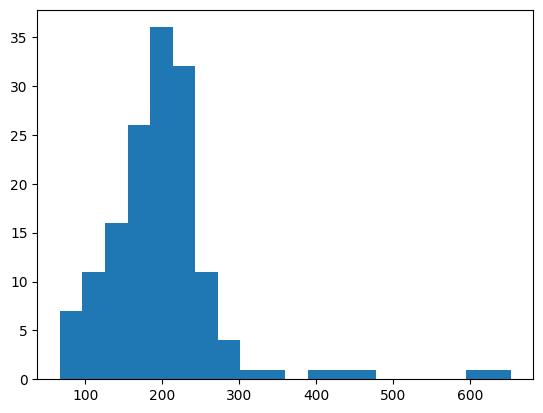

In [4]:
### Lemma count per video description
import spacy

nlp = spacy.load('en_core_web_sm')

df['lemma_count'] = [len([token.lemma_ for token in nlp(text)]) for text in df['title_description']]

# plot the distribution of the lemma count
plt.hist(df['lemma_count'], bins=20)

In [5]:
# shortest video description
df[df['lemma_count'] == df['lemma_count'].min()]

,video_id,title_description,lemma_count
147,7d1e2faf-0b44-40a5-90ec-648cc5aaa4c5,Master Your Sleep & Be More Alert When Awake T...,67


In [6]:
# longest video description
df[df['lemma_count'] == df['lemma_count'].max()]

,video_id,title_description,lemma_count
126,2ec3c49e-af7a-4824-9cc3-38b97326d4e1,How To Build Endurance In Your Brain & Body In...,653


### Tokenize the Video Descriptions


In [7]:
# string punctuation and lemmatize the title_description
import string

punct = string.punctuation

# lemma count per title_description
df['tokens'] = df['title_description'].apply(lambda x: [token.lemma_.lower() for token in nlp(x) if token.lemma_ not in punct])

df.head()

,video_id,title_description,lemma_count,tokens
0,013b57d7-9be5-44ba-9dc9-39b36756d8c7,Guest Series | Dr. Paul Conti: How to Improve ...,181,"[guest, series, dr., paul, conti, how, to, imp..."
1,a6d11059-3469-4d6f-b504-ad668e5363a4,Journal Club with Dr. Peter Attia | Metformin ...,194,"[journal, club, with, dr., peter, attia, metfo..."
2,cbf66352-656d-473b-8758-663677c5c0a2,Guest Series | Dr. Paul Conti: How to Understa...,196,"[guest, series, dr., paul, conti, how, to, und..."
3,5fc06db9-ba1d-4929-867f-f38211bace03,"Marc Andreessen: How Risk Taking, Innovation &...",219,"[marc, andreessen, how, risk, taking, innovati..."
4,e88a22cb-01e1-4897-a1ab-e68f899056a3,Goals Toolkit: How to Set & Achieve Your Goals...,152,"[goal, toolkit, how, to, set, achieve, your, g..."


In [8]:
## Let's look at the differences between the title_description and the tokens
from IPython.display import display, HTML

# make a table of the title_description and the tokens
title_descript = df['title_description'][0]
tokens = df['tokens'][0]

# display the table
display(HTML(f'<table><tr><td>{title_descript}</td><td>{tokens}</td></tr></table>'))

"Guest Series | Dr. Paul Conti: How to Improve Your Mental Health This is episode 2 of a 4-part special series on mental health with Dr. Paul Conti, M.D., a Stanford and Harvard-trained psychiatrist currently running a clinical practice, the Pacific Premier Group. Dr. Conti explains specific tools for how to overcome life’s challenges using a framework of self-inquiry that explores all the key elements of self, including defense mechanisms, behaviors, self-awareness and attention. We also discuss our internal driving forces, how to align them and ultimately, how to cultivate a powerful “generative drive” of positive, aspirational pursuits. Dr. Conti also explains how to adjust your internal narratives, reduce self-limiting concepts, overcome intrusive thoughts, and how certain defense mechanisms, such as “acting out” or narcissism, show up in ourselves and others. The next episode in this special series explores how to build healthy relationships with others.","['guest', 'series', 'dr.', 'paul', 'conti', 'how', 'to', 'improve', 'your', 'mental', 'health', 'this', 'be', 'episode', '2', 'of', 'a', '4', 'part', 'special', 'series', 'on', 'mental', 'health', 'with', 'dr.', 'paul', 'conti', 'm.d.', 'a', 'stanford', 'and', 'harvard', 'train', 'psychiatrist', 'currently', 'run', 'a', 'clinical', 'practice', 'the', 'pacific', 'premier', 'group', 'dr.', 'conti', 'explain', 'specific', 'tool', 'for', 'how', 'to', 'overcome', 'life', '’s', 'challenge', 'use', 'a', 'framework', 'of', 'self', 'inquiry', 'that', 'explore', 'all', 'the', 'key', 'element', 'of', 'self', 'include', 'defense', 'mechanism', 'behavior', 'self', 'awareness', 'and', 'attention', 'we', 'also', 'discuss', 'our', 'internal', 'driving', 'force', 'how', 'to', 'align', 'they', 'and', 'ultimately', 'how', 'to', 'cultivate', 'a', 'powerful', 'generative', 'drive', 'of', 'positive', 'aspirational', 'pursuit', 'dr.', 'conti', 'also', 'explain', 'how', 'to', 'adjust', 'your', 'internal', 'narrative', 'reduce', 'self', 'limit', 'concept', 'overcome', 'intrusive', 'thought', 'and', 'how', 'certain', 'defense', 'mechanism', 'such', 'as', 'act', 'out', 'or', 'narcissism', 'show', 'up', 'in', 'ourselves', 'and', 'other', 'the', 'next', 'episode', 'in', 'this', 'special', 'series', 'explore', 'how', 'to', 'build', 'healthy', 'relationship', 'with', 'other']"


In [9]:
unique_tokens = set(tokens)
print(f'There are {len(tokens)} tokens in the title_description')
print(f'There are {len(unique_tokens)} unique tokens in the title_description')

There are 151 tokens in the title_description
There are 99 unique tokens in the title_description


### Tokenize the Text

In [10]:
# explode the lemma_text column
# pandas docs: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html

token_df = (df
      .explode('tokens')
      .drop(columns=['title_description', 'lemma_count'])
)

token_df.head(10)

,video_id,tokens
0,013b57d7-9be5-44ba-9dc9-39b36756d8c7,guest
0,013b57d7-9be5-44ba-9dc9-39b36756d8c7,series
0,013b57d7-9be5-44ba-9dc9-39b36756d8c7,dr.
0,013b57d7-9be5-44ba-9dc9-39b36756d8c7,paul
0,013b57d7-9be5-44ba-9dc9-39b36756d8c7,conti
0,013b57d7-9be5-44ba-9dc9-39b36756d8c7,how
0,013b57d7-9be5-44ba-9dc9-39b36756d8c7,to
0,013b57d7-9be5-44ba-9dc9-39b36756d8c7,improve
0,013b57d7-9be5-44ba-9dc9-39b36756d8c7,your
0,013b57d7-9be5-44ba-9dc9-39b36756d8c7,mental


### Create a TF count dataframe

In [11]:
# create a word frequency dataframe
# pandas dot notation

term_frequency = (token_df
                  .groupby(by=['video_id', 'tokens'])
                  .agg({'tokens': 'count'})
                  .rename(columns={'tokens': 'term_frequency'})
                  .reset_index()
                  .rename(columns={'tokens': 'term'})
                 )

term_frequency.head()

,video_id,term,term_frequency
0,00a1413c-f927-41e9-9daf-be804ec97915,a,6
1,00a1413c-f927-41e9-9daf-be804ec97915,action,2
2,00a1413c-f927-41e9-9daf-be804ec97915,actionable,1
3,00a1413c-f927-41e9-9daf-be804ec97915,actually,1
4,00a1413c-f927-41e9-9daf-be804ec97915,adapt,1


### Remove stop words

We don't and won't always want to remove stopwords but in this case we are wanting to discover words that are more-or-less semantically rich in the documents. Thus, we can use Zipf's law above to discover and remove the most frequently used words in the documents.

In [12]:
# we aren't so interested in stop words
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
         'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
         'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
         'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
         'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
         'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 've', 'll', 'amp']

### Create a TF Dataframe

In [13]:
# remove stop words
term_frequency = term_frequency.drop(term_frequency[term_frequency['term'].isin(stop_words)].index)
term_frequency

,video_id,term,term_frequency
1,00a1413c-f927-41e9-9daf-be804ec97915,action,2
2,00a1413c-f927-41e9-9daf-be804ec97915,actionable,1
3,00a1413c-f927-41e9-9daf-be804ec97915,actually,1
4,00a1413c-f927-41e9-9daf-be804ec97915,adapt,1
5,00a1413c-f927-41e9-9daf-be804ec97915,age,1
...,...,...,...
15450,fd05ae2b-ea75-4cda-a1ed-2ef8108c2e65,violence,1
15453,fd05ae2b-ea75-4cda-a1ed-2ef8108c2e65,woman,1
15454,fd05ae2b-ea75-4cda-a1ed-2ef8108c2e65,work,1
15455,fd05ae2b-ea75-4cda-a1ed-2ef8108c2e65,—,2


### Create a Document Frequency Dataframe

In [14]:
# Document Frequency
document_frequency = (term_frequency
                      .groupby(['video_id', 'term'])
                      .size()
                      .unstack()
                      .sum()
                      .reset_index()
                      .rename(columns={0: 'document_frequency'})
                     )

document_frequency.head(25)

,term,document_frequency
0,,11.0
1,):,2.0
2,1,8.0
3,10,5.0
4,11,3.0
5,12,5.0
6,120,1.0
7,12minutes,1.0
8,13,2.0
9,14,2.0


### Merge the TF and DF Dataframes to create TF-IDF

In [15]:
# merge the document freqs into the term dataframe
term_frequency = term_frequency.merge(document_frequency)

In [16]:
documents_in_corpus = term_frequency['video_id'].nunique()
documents_in_corpus

150

### Calculate the Term Frequency

In [17]:
# inverse document frequency
import numpy as np

term_frequency['idf'] = np.log((1 + documents_in_corpus) / (1 + term_frequency['document_frequency'])) + 1

In [18]:
term_frequency

,video_id,term,term_frequency,document_frequency,idf
0,00a1413c-f927-41e9-9daf-be804ec97915,action,2,10.0,3.619385
1,06fef52a-0ff6-4db3-b612-d405948a1000,action,5,10.0,3.619385
2,25ed3b4d-d788-48fa-8177-3c2c87b4d0c5,action,1,10.0,3.619385
3,284a4ac2-4553-4a44-ba35-9c70d106fac5,action,1,10.0,3.619385
4,5d3bb2f1-13fa-4508-99d3-7c97da00397d,action,1,10.0,3.619385
...,...,...,...,...,...
11912,fd05ae2b-ea75-4cda-a1ed-2ef8108c2e65,secure,1,1.0,5.324133
11913,fd05ae2b-ea75-4cda-a1ed-2ef8108c2e65,stalker,1,1.0,5.324133
11914,fd05ae2b-ea75-4cda-a1ed-2ef8108c2e65,texas,1,1.0,5.324133
11915,fd05ae2b-ea75-4cda-a1ed-2ef8108c2e65,triad,1,1.0,5.324133


### Calculate the TF-IDF values

In [19]:
term_frequency['tfidf'] = term_frequency['term_frequency'] * term_frequency['idf']
term_frequency.sort_values(by=['term_frequency'], ascending=False)

,video_id,term,term_frequency,document_frequency,idf,tfidf
6524,2ec3c49e-af7a-4824-9cc3-38b97326d4e1,,42,11.0,3.532373,148.359674
6518,0ef0d152-ba2f-41a2-9b83-f5b6dcf49e04,,35,11.0,3.532373,123.633062
6520,25ed3b4d-d788-48fa-8177-3c2c87b4d0c5,,30,11.0,3.532373,105.971196
6521,26ad9b8c-e102-48a2-b7e7-01f737401c90,,30,11.0,3.532373,105.971196
6522,2b445985-2ee1-41ab-8549-c1083ea463fd,,25,11.0,3.532373,88.309330
...,...,...,...,...,...,...
4736,e38ace29-884e-4b84-9e49-3df933e69765,stress,1,30.0,2.583293,2.583293
4738,f6c30f0b-d4c7-4767-ace4-5e5b018ef048,stress,1,30.0,2.583293,2.583293
4739,fafc8529-e9d5-49c5-993a-3dd23b2f3468,stress,1,30.0,2.583293,2.583293
4740,04a01e68-ce0f-41e7-a485-c885853104fa,technique,1,7.0,3.937838,3.937838


### Normalize the values for interpretation

In [20]:
from sklearn import preprocessing
term_frequency['tfidf_norm'] = preprocessing.normalize(term_frequency[['tfidf']], axis=0, norm='l2')

In [21]:
term_frequency

,video_id,term,term_frequency,document_frequency,idf,tfidf,tfidf_norm
0,00a1413c-f927-41e9-9daf-be804ec97915,action,2,10.0,3.619385,7.238769,0.010238
1,06fef52a-0ff6-4db3-b612-d405948a1000,action,5,10.0,3.619385,18.096923,0.025596
2,25ed3b4d-d788-48fa-8177-3c2c87b4d0c5,action,1,10.0,3.619385,3.619385,0.005119
3,284a4ac2-4553-4a44-ba35-9c70d106fac5,action,1,10.0,3.619385,3.619385,0.005119
4,5d3bb2f1-13fa-4508-99d3-7c97da00397d,action,1,10.0,3.619385,3.619385,0.005119
...,...,...,...,...,...,...,...
11912,fd05ae2b-ea75-4cda-a1ed-2ef8108c2e65,secure,1,1.0,5.324133,5.324133,0.007530
11913,fd05ae2b-ea75-4cda-a1ed-2ef8108c2e65,stalker,1,1.0,5.324133,5.324133,0.007530
11914,fd05ae2b-ea75-4cda-a1ed-2ef8108c2e65,texas,1,1.0,5.324133,5.324133,0.007530
11915,fd05ae2b-ea75-4cda-a1ed-2ef8108c2e65,triad,1,1.0,5.324133,5.324133,0.007530


### Explore the TF-IDF values and Terms

In [31]:
top_n_terms = term_frequency.sort_values(by=['video_id', 'tfidf'], ascending=[True, False]).groupby(['video_id']).head(5)

In [32]:
top_n_terms.head(10)

,video_id,term,term_frequency,document_frequency,idf,tfidf,tfidf_norm
1087,00a1413c-f927-41e9-9daf-be804ec97915,jocko,5,1.0,5.324133,26.620663,0.037651
2047,00a1413c-f927-41e9-9daf-be804ec97915,,5,8.0,3.820055,19.100276,0.027015
1288,00a1413c-f927-41e9-9daf-be804ec97915,mindset,3,9.0,3.714695,11.144084,0.015762
488,00a1413c-f927-41e9-9daf-be804ec97915,discipline,2,1.0,5.324133,10.648265,0.015061
1999,00a1413c-f927-41e9-9daf-be804ec97915,willink,2,1.0,5.324133,10.648265,0.015061
2193,013b57d7-9be5-44ba-9dc9-39b36756d8c7,conti,4,3.0,4.630985,18.523942,0.026200
1631,013b57d7-9be5-44ba-9dc9-39b36756d8c7,self,4,20.0,2.972757,11.891030,0.016818
2725,013b57d7-9be5-44ba-9dc9-39b36756d8c7,series,3,9.0,3.714695,11.144084,0.015762
2199,013b57d7-9be5-44ba-9dc9-39b36756d8c7,defense,2,2.0,4.918668,9.837335,0.013914
2636,013b57d7-9be5-44ba-9dc9-39b36756d8c7,paul,2,3.0,4.630985,9.261971,0.013100


In [33]:
vidIds = top_n_terms['video_id'].tolist()

### Visualize the TF-IDF values

We use a heatmap to visualize the TF-IDF values.

In [34]:
tfidf_df = top_n_terms[['video_id', 'term', 'tfidf_norm']]
tfidf_df.head()

,video_id,term,tfidf_norm
1087,00a1413c-f927-41e9-9daf-be804ec97915,jocko,0.037651
2047,00a1413c-f927-41e9-9daf-be804ec97915,,0.027015
1288,00a1413c-f927-41e9-9daf-be804ec97915,mindset,0.015762
488,00a1413c-f927-41e9-9daf-be804ec97915,discipline,0.015061
1999,00a1413c-f927-41e9-9daf-be804ec97915,willink,0.015061


In [35]:
n = 5
top_tfidf = (tfidf_df
             .sort_values(by=['video_id', 'tfidf_norm'], ascending=[True,False])
             .groupby(['video_id'])
             .head(n)
            )

top_tfidf.head(10)

,video_id,term,tfidf_norm
1087,00a1413c-f927-41e9-9daf-be804ec97915,jocko,0.037651
2047,00a1413c-f927-41e9-9daf-be804ec97915,,0.027015
1288,00a1413c-f927-41e9-9daf-be804ec97915,mindset,0.015762
488,00a1413c-f927-41e9-9daf-be804ec97915,discipline,0.015061
1999,00a1413c-f927-41e9-9daf-be804ec97915,willink,0.015061
2193,013b57d7-9be5-44ba-9dc9-39b36756d8c7,conti,0.026200
1631,013b57d7-9be5-44ba-9dc9-39b36756d8c7,self,0.016818
2725,013b57d7-9be5-44ba-9dc9-39b36756d8c7,series,0.015762
2199,013b57d7-9be5-44ba-9dc9-39b36756d8c7,defense,0.013914
2636,013b57d7-9be5-44ba-9dc9-39b36756d8c7,paul,0.013100


In [39]:
# Import altair for graphing the n highest terms in a heatmap

try:
    import altair as alt
except ModuleNotFoundError:
    !pip install altair --quiet

# adding a little randomness to break ties in term ranking
top_tfidf_rand = top_tfidf.copy()
top_tfidf_rand['tfidf_norm'] = top_tfidf_rand['tfidf_norm'] + np.random.rand(top_tfidf.shape[0])*0.0001

base = alt.Chart(top_tfidf_rand).encode(
    x = 'rank:O',
    y = 'video_id:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf_norm", order="descending")],
    groupby = ["video_id"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf_norm:Q'
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + text).properties(width = 800)

alt.LayerChart(...)

### Add the links by merging on video_ids

In [37]:
tfidf_df_titles = pd.merge(top_n_terms, df, on='video_id')

In [38]:
tfidf_df_titles.head()

,video_id,term,term_frequency,document_frequency,idf,tfidf,tfidf_norm,title_description,lemma_count,tokens
0,00a1413c-f927-41e9-9daf-be804ec97915,jocko,5,1.0,5.324133,26.620663,0.037651,"Jocko Willink: How to Become Resilient, Forge ...",287,"[jocko, willink, how, to, become, resilient, f..."
1,00a1413c-f927-41e9-9daf-be804ec97915,,5,8.0,3.820055,19.100276,0.027015,"Jocko Willink: How to Become Resilient, Forge ...",287,"[jocko, willink, how, to, become, resilient, f..."
2,00a1413c-f927-41e9-9daf-be804ec97915,mindset,3,9.0,3.714695,11.144084,0.015762,"Jocko Willink: How to Become Resilient, Forge ...",287,"[jocko, willink, how, to, become, resilient, f..."
3,00a1413c-f927-41e9-9daf-be804ec97915,discipline,2,1.0,5.324133,10.648265,0.015061,"Jocko Willink: How to Become Resilient, Forge ...",287,"[jocko, willink, how, to, become, resilient, f..."
4,00a1413c-f927-41e9-9daf-be804ec97915,willink,2,1.0,5.324133,10.648265,0.015061,"Jocko Willink: How to Become Resilient, Forge ...",287,"[jocko, willink, how, to, become, resilient, f..."
